In [4]:
DEPARTURE = 'LEMD'
DESTINATIONS = [
  # 'LEAS',
  # 'LEBB',
  'LEBL',
  # 'LECO',
  # 'LEGR',
  # 'LEJR'
]

FLIGHTS_PATH = 'data/flights'
FLIGHTS_POINTS_PATH = 'data/flight_points'

GRAPHS_PATH = f'results/graphs/single-trajectory/exploration'

In [5]:
from sklearn.pipeline import Pipeline
from src.preprocesing.data_loader import DataLoader
from src.preprocesing.flight_filter import FlightFilter
from src.features.trajectory_calculator import TrajectoryCalculator

pipeline = Pipeline([
    ('data_loader', DataLoader(FLIGHTS_PATH, FLIGHTS_POINTS_PATH)),
    ('flight_filter', FlightFilter(DEPARTURE, DESTINATIONS)),
    ('trajectory_calculator', TrajectoryCalculator())])

result = pipeline.transform(None)
trajectories = result['trajectories']

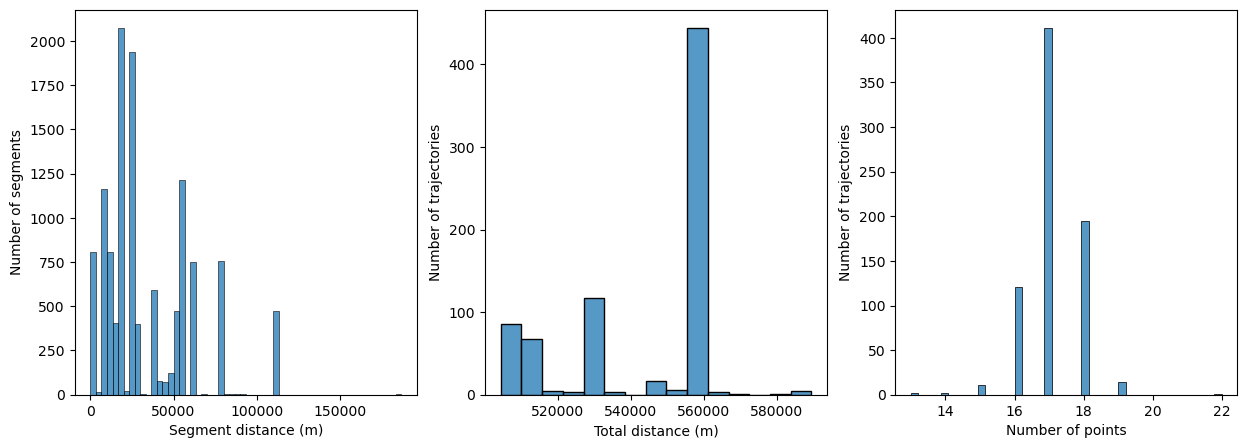

In [6]:
from utils.distances import calculate_total_distance, calculate_point_distances
import seaborn as sns
import matplotlib.pyplot as plt

num_points = [len(trajectory) for trajectory in trajectories]

# Calcula las distancias totales y los tramos entre puntos para cada trayectoria
total_distances = []
point_distances = []
for trajectory in trajectories:
    total_distances.append(calculate_total_distance(trajectory))
    point_distances.extend(calculate_point_distances(trajectory))

# Crea una figura con dos subtramas
fig, (ax, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Crea el primer histograma con las distancias de los tramos entre puntos
sns.histplot(point_distances, ax=ax)
ax.set_xlabel('Segment distance (m)')
ax.set_ylabel('Number of segments')

# Crea el segundo histograma con las distancias totales de las trayectorias
sns.histplot(total_distances, ax=ax2)
ax2.set_xlabel('Total distance (m)')
ax2.set_ylabel('Number of trajectories')

sns.histplot(num_points, ax=ax3)
ax3.set_xlabel('Number of points')
ax3.set_ylabel('Number of trajectories')

plt.savefig(f'{GRAPHS_PATH}/initial_distribution.png', dpi=300)
plt.show()

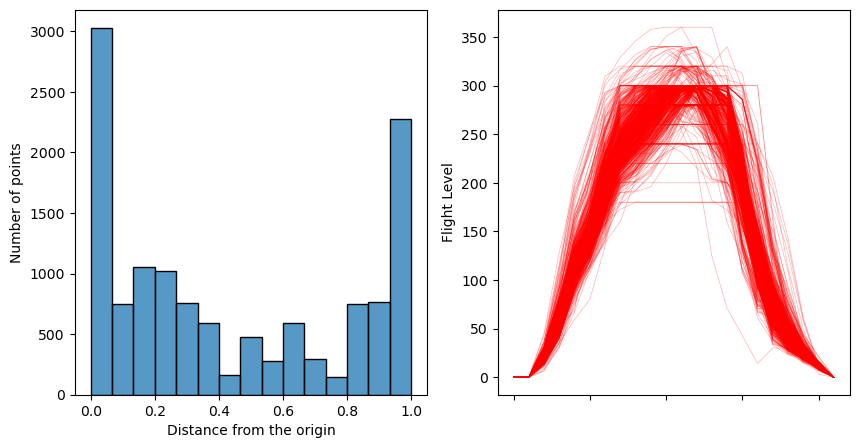

In [11]:
from utils.graphs import accumulated_distance, altitude_profile

filtered_trajectories = [trajectory for trajectory in trajectories]

# Crea una figura con dos subtramas
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(10, 5))

accumulated_distance(filtered_trajectories, ax)

altitude_profile(filtered_trajectories, ax2)

plt.savefig(f'{GRAPHS_PATH}/first_normalization_distribution.png', dpi=300)
plt.show()

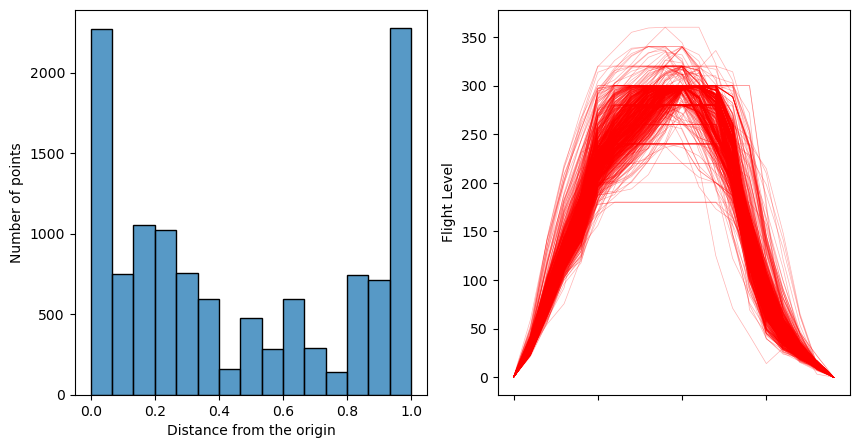

In [12]:
from utils.trajectories import remove_taxi
from utils.graphs import accumulated_distance, altitude_profile

filtered_trajectories = [remove_taxi(trajectory) for trajectory in trajectories]

# Crea una figura con dos subtramas
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(10, 5))

accumulated_distance(filtered_trajectories, ax)

altitude_profile(filtered_trajectories, ax2)

plt.savefig(f'{GRAPHS_PATH}/taxi_normalization_distribution.png', dpi=300)
plt.show()

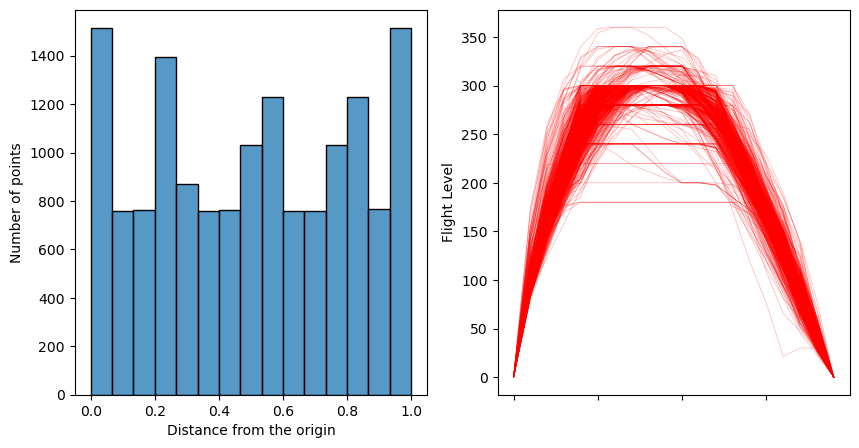

In [13]:
from utils.trajectories import remove_taxi
from utils.graphs import accumulated_distance, altitude_profile
from utils.trajectories import interpolate_trajectory

normalized_trajectories = [remove_taxi(trajectory) for trajectory in trajectories]
points_num = max([len(trajectory) for trajectory in normalized_trajectories])
interpolated_trajectories = [interpolate_trajectory(trajectory, points_num) for trajectory in normalized_trajectories]

# Crea una figura con dos subtramas
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(10, 5))

accumulated_distance(interpolated_trajectories, ax)

altitude_profile(interpolated_trajectories, ax2)

plt.savefig(f'{GRAPHS_PATH}/interpolation_distribution.png', dpi=300)
plt.show()